In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys
from sklearn.cluster import KMeans
from matplotlib import style
style.use('ggplot')

In [8]:
udara = pd.read_csv('AirQualityUCI.csv', sep=";", usecols=[
    "NMHC(GT)", "NO2(GT)"])
udara.head()

,NMHC(GT),NO2(GT)
0,150.0,113.0
1,112.0,92.0
2,88.0,114.0
3,80.0,122.0
4,51.0,116.0


In [9]:
udara_x = udara.iloc[:,0:2]
udara_x.head()
x_array = np.array(udara_x)

In [10]:
print('------Data AIR-----')
print(udara)

------Data AIR-----
      NMHC(GT)  NO2(GT)
0        150.0    113.0
1        112.0     92.0
2         88.0    114.0
3         80.0    122.0
4         51.0    116.0
...        ...      ...
9466       NaN      NaN
9467       NaN      NaN
9468       NaN      NaN
9469       NaN      NaN
9470       NaN      NaN

[9471 rows x 2 columns]


In [11]:
nCluster = 3

In [13]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')

x_array_imputed = imputer.fit_transform(x_array)

kmeans = KMeans(n_clusters=nCluster)
kmeans.fit(x_array_imputed)

udara["kluster"] = kmeans.labels_

centroid = kmeans.cluster_centers_
labels = kmeans.labels_

print('------Centroid-----')
print(centroid)
print('------Labels-----')
print(labels)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


------Centroid-----
[[-199.17942656  113.86976735]
 [-194.69573171 -200.        ]
 [ 226.83066362   99.01144165]]
------Labels-----
[2 2 2 ... 0 0 0]


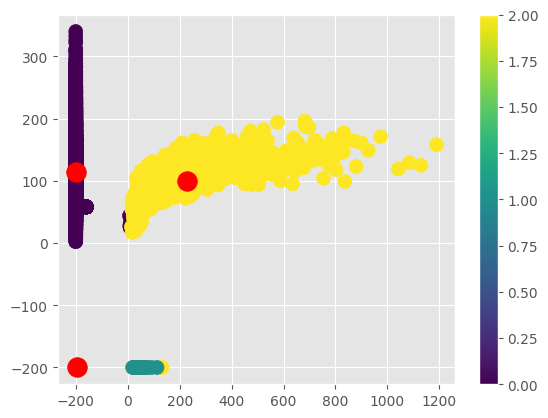

In [15]:
# Menampilkan visualisasi
output = plt.scatter(x_array_imputed[:,0], x_array_imputed[:,1],s=100, c=udara.kluster,
                     marker='o', alpha=1,)
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=1, marker='o')
plt.title=('Hasil Klustering K-means')
plt.colorbar(output)
plt.show()